# Introduction to TensorFlow Using the MNIST Dataset

## Prerequisites
* Knowledge of some Machine Learning tasks, at least supervised learning. 
* A good understanding of basic Linear Algebra principles.
* Proficiency in Python programming.

## MNIST:
* 20 year old computer vision dataset of handwritten digits and labels.

<br />
![](https://kuanhoong.files.wordpress.com/2016/01/mnistdigits.gif)

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
x, y = mnist.train.next_batch(13)

In [5]:
x.shape

(13, 784)

In [6]:
y.shape

(13, 10)

In [7]:
y[3]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [8]:
plt.imshow(x[3].reshape((28, 28)))

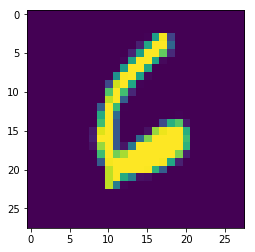

In [9]:
plt.show()

## Linear Function
$$ y = Wx + b $$

## Softmax 
![](https://jamesmccaffrey.files.wordpress.com/2016/03/softmaxequation.jpg?w=640)

## Cross Entropy 
$$ H_{y'}(y) = -\sum_i y'_i \log(y_i)$$

## Code

In [84]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [85]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [86]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [87]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [88]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [89]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    loss,l = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_: batch_ys})
    if i%50 == 0:
        print('loss = ' + str(loss))

loss = 2.30258
loss = 0.517546
loss = 0.385641
loss = 0.185132
loss = 0.416714
loss = 0.349837
loss = 0.278203
loss = 0.271538
loss = 0.329917
loss = 0.406297
loss = 0.247863
loss = 0.253718
loss = 0.276027
loss = 0.246821
loss = 0.298122
loss = 0.161025
loss = 0.291242
loss = 0.178526
loss = 0.335457
loss = 0.324847


In [90]:
loss

0.21131219

In [91]:
#Test our trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.9189
